In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
df = pd.read_csv('/content/Social_Network_Ads.csv')

In [56]:
df= df.iloc[:,2:]

In [57]:
df.sample(5)

,Age,EstimatedSalary,Purchased
4,19,76000,0
210,48,96000,1
175,23,28000,0
239,53,143000,1
120,36,75000,0


In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(df.drop('Purchased', axis=1),
                                                   df['Purchased'],
                                                   test_size=0.3,
                                                   random_state=0)
X_train.shape, X_test.shape

((280, 2), (120, 2))

In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(df.drop('Purchased', axis=1))

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [60]:
pd.DataFrame(X_train_scaled).describe()

,0,1
count,280.000000,280.000000
mean,0.019990,0.001898
std,0.975972,1.017234
min,-1.877311,-1.607506
25%,-0.731153,-0.785290
50%,-0.062561,0.022244
75%,0.797057,0.536129
max,2.134241,2.356750


In [61]:
pd.DataFrame(X_test_scaled).describe()

,0,1
count,120.000000,120.000000
mean,-0.046642,-0.004429
std,1.060654,0.967094
min,-1.877311,-1.607506
25%,-0.922179,-0.667830
50%,-0.158074,-0.153945
75%,0.725422,0.506764
max,2.134241,2.356750


In [62]:
scaler.mean_

array([3.76550e+01, 6.97425e+04])

In [63]:
X_train

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [64]:
X_train_scaled

array([[-1.11320552, -1.60750566],
       [ 2.13424088,  0.94723686],
       [ 0.03295203,  1.24088543],
       [ 0.22397829,  1.09406114],
       [ 0.41500455, -0.49164111],
       [-0.25358736, -0.31545197],
       [ 0.98808332, -0.84401939],
       [ 0.98808332,  1.88691227],
       [ 0.03295203,  1.27025028],
       [-0.82666613,  2.29802026],
       [-1.11320552, -1.60750566],
       [ 2.13424088, -0.81465453],
       [-1.30423178, -1.49004624],
       [ 0.41500455,  2.32738512],
       [ 0.79705706,  0.77104772],
       [-0.92217926, -0.31545197],
       [ 0.12846516,  0.77104772],
       [-0.92217926,  0.56549373],
       [ 0.31949142,  0.06629116],
       [ 0.70154394, -1.28449224],
       [-0.44461362, -0.02180341],
       [-1.6862843 ,  0.35993973],
       [-0.63563988,  0.12502088],
       [ 0.41500455,  0.30121002],
       [-0.25358736,  0.06629116],
       [-0.44461362,  2.32738512],
       [ 0.22397829,  0.03692631],
       [ 1.27462271,  2.23929055],
       [ 0.79705706,

In [65]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [66]:
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [67]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.7,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.1,2.4


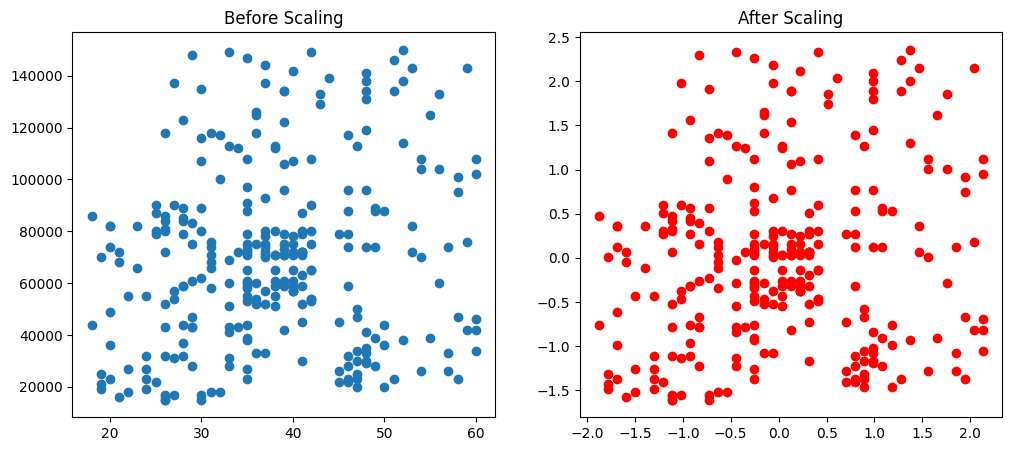

In [68]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title('Before Scaling')
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'], color='red')
ax2.set_title('After Scaling')
plt.show()

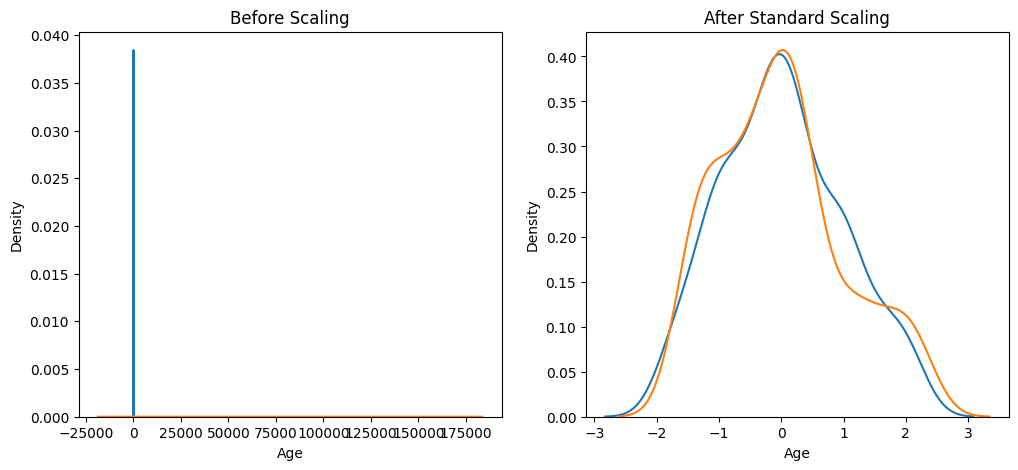

In [69]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

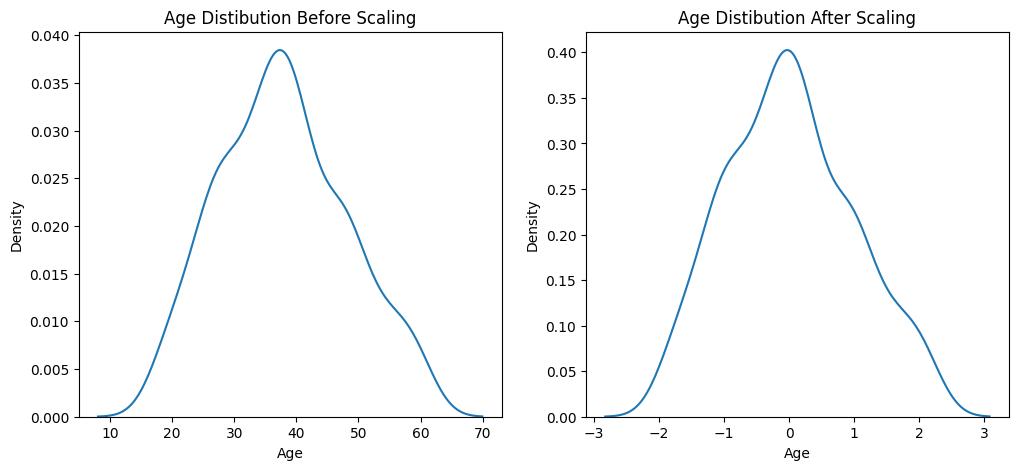

In [70]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.set_title('Age Distibution Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

ax2.set_title('Age Distibution After Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
plt.show()

In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [73]:
lr.fit(X_train,Y_train)
lr_scaled.fit(X_train_scaled,Y_train)

LogisticRegression()

In [74]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [75]:
from sklearn.metrics import accuracy_score

In [76]:
print("Actual", accuracy_score(Y_test,y_pred))
print("Scaled", accuracy_score(Y_test,y_pred_scaled))

Actual 0.875
Scaled 0.8666666666666667


In [77]:
from sklearn.tree import DecisionTreeClassifier

In [78]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [79]:
dt.fit(X_train,Y_train)
dt_scaled.fit(X_train_scaled,Y_train)

DecisionTreeClassifier()

In [80]:
Y_pred = dt.predict(X_test)
Y_pred_scaled = dt_scaled.predict(X_test_scaled)

In [81]:
print("Actual",accuracy_score(Y_test,Y_pred))
print("Scaled",accuracy_score(Y_test,Y_pred_scaled))

Actual 0.875
Scaled 0.875
